In [1]:
import numpy as np
import cPickle as pickle
import scipy
import combo
import os
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def download():
    if not os.path.exists('data/s5-210.csv'):

        if not os.path.exists('data'):
            os.mkdir('data')
            
        print('Downloading...')
        urllib.urlretrieve('http://www.tsudalab.org/files/s5-210.csv', 'data/s5-210.csv')
        print('Done')

In [3]:
def load_data():
    download()
    A =  np.asarray( np.loadtxt('data/s5-210.csv',skiprows=1,delimiter=',') )
    X = A[:,0:3]
    t  = -A[:,3]
    return X, t

In [4]:
# Load the data. 
# X is the N x d dimensional matrix. Each row of X denotes the d-dimensional feature vector of search candidate. 
# t is the N-dimensional vector that represents the corresponding negative energy of search candidates. 
# ( It is of course unknown in practice. )
X, t = load_data()
 
# Normalize the mean and standard deviation along the each column of X to 0 and 1, respectively
X = combo.misc.centering( X )

In [5]:
# Declare the class for calling the simulator. 
# In this tutorial, we simply refer to the value of t. 
# If you want to apply combo to other problems, you have to customize this class. 
class simulator:
    def __init__( self ):
        _, self.t = load_data()
    
    def __call__( self, action ):
        return self.t[action]

In [6]:
# Define the generative model of GPs. 
# In Combo, to use the GP inference, we have to define three elements: 
# kernel, mean of GP prior and likelihood. 

## Define the kernel 
## The ordinary Gaussian kernel is defined by 
cov = combo.gp.cov.gauss( X.shape[1], ard = False )

## If you want to use the Gaussian ARD kernel, set 'ard' to 'True'
## cov = combo.gp.cov.gauss(X.shape[1], ard = True )

## Define the mean of GP prior
## To employ the constant value as the mean of GP prior, write as below: 
mean = combo.gp.mean.const()
## Also, define the zero mean, i.e., always takes zero as 
# mean = combo.gp.mean.zero()

## Define the likelihood 
## define isotoropic Gaussian likelihood as bellow:
lik = combo.gp.lik.gauss()

# Finally, declare the generative model of Gaussian process as 
gp = combo.gp.model(lik=lik, mean = mean, cov = cov)

In [7]:
# set the configure for COMBO
# To modify the configure of COMBO,  you have to edit the configure files. 
# Please check 'config.ini' if you want to know how to write the configure file
# loading the configure files, write as follows:
config = combo.misc.set_config()
config.load('config.ini')
config.show()

( search )
dir_name: res
score: TS
max_search: 100
num_rand_search:  20
alpha:  1.0


( predict )
is_rand_expans:  True
num_basis:  5000


( learning )
method :  adam
is_hyparams_learning:  True
is_disp:  False
num_init_params_search:  20
interval:  20
max_epoch:  2000
max_epoch_init_params_search:  20
batch_size:  64
eval_size:  5000
alpha =  0.001
beta =  0.9
gamma =  0.999
epsilon =  1e-06




In [8]:
# design of policy

# Declaring the bayesian policy is performed by 
search = combo.search.bayes_policy( simulator(), X, config)

# if you want to use the random policy as baseline, define in the same manner: 
#search = combo.search.random_policy(simulator(), X, config)

# set the seed parameter 
search.set_seed( 0 )

# Execute the bayes search.  
# The file_name determines the name of output file which is generated after the search process. 
# If not defining, the file_name automatically become 'bayes_search_00x.dump', where x is the seed.  
search.run( gp, file_name='TS' )

# If you already have the training data ( train_X, train_t ), you can use it 
# search.run( gp , train_X = train_X, train_t = train_t )

Start the random search .....

001-th step: f(x) = -1.037109, max_f(x) = -1.037109 

002-th step: f(x) = -1.040397, max_f(x) = -1.037109 

003-th step: f(x) = -0.995182, max_f(x) = -0.995182 

004-th step: f(x) = -1.120972, max_f(x) = -0.995182 

005-th step: f(x) = -1.092801, max_f(x) = -0.995182 

006-th step: f(x) = -1.104426, max_f(x) = -0.995182 

007-th step: f(x) = -1.082187, max_f(x) = -0.995182 

008-th step: f(x) = -1.145944, max_f(x) = -0.995182 

009-th step: f(x) = -1.069718, max_f(x) = -0.995182 

010-th step: f(x) = -1.046275, max_f(x) = -0.995182 

011-th step: f(x) = -1.035465, max_f(x) = -0.995182 

012-th step: f(x) = -1.095248, max_f(x) = -0.995182 

013-th step: f(x) = -1.188696, max_f(x) = -0.995182 

014-th step: f(x) = -1.055151, max_f(x) = -0.995182 

015-th step: f(x) = -1.122468, max_f(x) = -0.995182 

016-th step: f(x) = -0.966407, max_f(x) = -0.966407 

017-th step: f(x) = -1.013328, max_f(x) = -0.966407 

018-th step: f(x) = -1.137878, max_f(x) = -0.966407

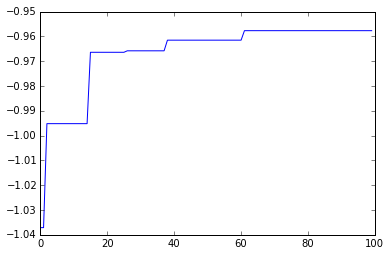

In [9]:
# The result of searching is summarized in the class search.res
# res.fx: observed negative energy at each step
# res.max_fx: the current maximum value of the negative energy that has been obserbed until each step
# res.config: the configure files when search was performed
plt.plot(search.res.max_fx)

In [10]:
# load 
with open('res/TS.dump') as f:
        res =pickle.load(f)

In [11]:
print res.fx
print res.max_fx

[-1.03710867 -1.04039693 -0.99518235 -1.1209724  -1.09280121 -1.10442594
 -1.08218651 -1.14594404 -1.06971803 -1.04627468 -1.03546497 -1.09524828
 -1.18869562 -1.05515129 -1.12246828 -0.96640706 -1.01332817 -1.13787848
 -1.00444047 -1.02188212 -0.98633985 -1.07910265 -1.07301539 -0.99309688
 -0.98586795 -0.99849108 -0.96581093 -1.05304791 -1.02555813 -1.0511711
 -1.00674853 -1.04797012 -0.98299474 -1.09303545 -0.97573312 -1.00840019
 -1.20785148 -1.02274064 -0.96151604 -1.01660761 -0.99265142 -1.07959673
 -1.05278041 -1.20550732 -1.01711107 -0.99881942 -2.97263767 -0.9659562
 -1.01525359 -0.96672261 -0.99040647 -1.02261869 -0.9761746  -1.00907677
 -1.11086287 -1.01326904 -1.01809524 -1.05545633 -1.01522488 -1.08295833
 -1.02262466 -0.95768794 -1.04741862 -1.0429924  -1.11358428 -1.02221871
 -0.99844957 -1.16932229 -1.03159167 -0.98597598 -0.96375929 -1.08918262
 -1.00807924 -1.07385685 -1.01229851 -1.01812992 -1.05087147 -1.00056347
 -0.9829629  -1.06925494 -1.04962548 -1.06388065 -0.9